In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
G1=(lambda x,y,z: 3*x - y - z - 1., \
    lambda x,y,z: -x + 3*y + z - 3., \
    lambda x,y,z: 2*x + y + 4*z - 7.)

In [3]:
def GetF(G,r):
    
    n = r.shape[0]
    
    v = np.zeros_like(r)
    
    for i in range(n):
        v[i] = G[i](r[0],r[1],r[2])
        
    return v

In [4]:
GetF(G1,np.array([0.,0.,0.]))

array([-1., -3., -7.])

In [5]:
def Metric(G,r):
    return 0.5*np.linalg.norm(GetF(G,r))**2

In [6]:
Metric(G1,np.array([1.,5.,1.]))

88.0

In [7]:
def GetJacobian(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h
            
            J[i,j] = ( f[i](rf[0],rf[1],rf[2]) - f[i](rb[0],rb[1],rb[2])  )/(2*h)
            
    
    return J

In [8]:
GetJacobian(G1,np.array([1.,5.,1.]))

array([[ 3., -1., -1.],
       [-1.,  3.,  1.],
       [ 2.,  1.,  4.]])

In [9]:
def GetFig(R,M,it):
    
    fig = plt.figure(figsize=(6,3))
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    
    ax.plot(R[:it])
    
    ax1.plot(M[:it])
   
    plt.show()

In [10]:
def Minimizer(G,r,lr=1e-3,epochs=int(1e4),error=1e-7):
    
    metric = 1
    it = 0
    
    M = np.array([])
    R = np.array([r])
    
    while metric > error and it < epochs:
        
        M = np.append(M,Metric(G,r))
        
        J = GetJacobian(G,r)
        Vector = GetF(G,r)
        
        # Machine learning
        r -= lr*np.dot(J,Vector)
        
        R = np.vstack((R,r))
        
        metric = Metric(G,r)
        
        it += 1
        
        if it%50 == 0:
            clear_output(wait=True)
            GetFig(R,M,it)
            print(r)
            time.sleep(0.01)
    
    return r

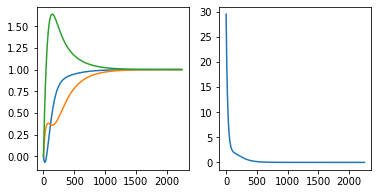

[0.99995152 0.99980608 1.00014544]


In [12]:
xsol = Minimizer(G1,np.array([0.,0.,0.]))